<a href="https://colab.research.google.com/github/MoreCookies/scifair23-24/blob/main/HAM10000_fastAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import fastai
# from fastai.vision import *
from fastai.vision.core import *
from fastai.vision.augment import *
from fastai.vision.data import *
from fastai.data.transforms import *
from fastai.vision.all import *
import numpy as np
import pandas as pd

In [ ]:
np.random.seed(3)

In [ ]:
!pip install kaggle

In [ ]:
!mkdir kaggle

In [ ]:
from google.colab import userdata


In [ ]:
import os
import json
api_token = {"username":"fancychicken","key":userdata.get('kaggleKey')}
with open('/content/kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)

In [ ]:
!chmod 600 /content/kaggle/kaggle.json

In [ ]:
!kaggle

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!cp /content/kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!mkdir derm

In [ ]:
!kaggle datasets download kmader/skin-cancer-mnist-ham10000 -p /content/derm

100% 5.20G/5.20G [04:05<00:00, 24.8MB/s]
100% 5.20G/5.20G [04:05<00:00, 22.7MB/s]


In [ ]:
!unzip /content/derm/skin-cancer-mnist-ham10000.zip -d /content/derm

Streaming output truncated to the last 5000 lines.
  inflating: /content/derm/ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: /content/derm/ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: /content/derm/ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: /content/derm/ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: /content/derm/ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: /content/derm/ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: /content/derm/ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: /content/derm/ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: /content/derm/ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: /content/derm/ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: /content/derm/ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: /content/derm/ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: /content/derm/ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: /content/derm/ham10000_images_part_2/IS

In [ ]:
import shutil

shutil.rmtree('/content/derm/ham10000_images_part_1')
shutil.rmtree('/content/derm/ham10000_images_part_2')

In [ ]:
import os
os.rename('/content/derm/HAM10000_images_part_1', '/content/derm/p1')
os.rename('/content/derm/HAM10000_images_part_2', '/content/derm/p2')

In [ ]:
import os
import shutil
for item in os.listdir("/content/derm"):
  shutil.move(os.path.join('/content/derm/', item), '/content/')

In [ ]:
from glob import glob
import os
from pathlib import Path

In [ ]:
print(os.listdir("derm"))

[]


In [ ]:
img_paths = glob("**/*.jpg", recursive=True)
print(f"number of jpg files {len(img_paths)}")

number of jpg files 10015


In [ ]:
#!unzip HAM10000_images_part_1.zip

In [ ]:
#!unzip HAM10000_images_part_2.zip

In [ ]:
csv_match_result = glob("**/HAM10000_metadata.csv", recursive=True)
print(len(csv_match_result))
all_img_file_paths = glob('**/p*/*.jpg', recursive=True)
print(len(all_img_file_paths))

1
10015


In [ ]:
path = Path("")
csv_match_result = glob("**/HAM10000_metadata.csv", recursive=True)
ham_meta_path = csv_match_result[0]
#labels = pd.read_csv('HAM10000_metadata.csv', sep=',')
labels = pd.read_csv(ham_meta_path, sep=',')
labels.head()

## map each row to an image path

img_path_dict = {}
all_img_file_paths = glob('**/p*/*.jpg', recursive=True)
for img_file_path in all_img_file_paths:
    img_path_dict[os.path.basename(img_file_path)] = img_file_path

def get_img_path(img_id):
    base_filename = img_id + ".jpg"
    full_img_path = img_path_dict.get(base_filename)
    if full_img_path is None:
        print(f"failed to match img_id {img_id}")
        raise Exception(f"failed to match img_id {img_id}")
    return full_img_path

labels['path'] = labels['image_id'].apply(get_img_path)

labels.sample(5)

#type(labels)  # pandas.core.frame.DataFrame

lesion_id      image_id     dx    dx_type   age     sex  \
5080  HAM_0004175  ISIC_0028806     nv  follow_up  50.0  female   
564   HAM_0006595  ISIC_0028223    bkl      histo  55.0  female   
7369  HAM_0005248  ISIC_0032948     nv      histo  45.0  female   
5150  HAM_0001592  ISIC_0030686     nv  follow_up  55.0    male   
9790  HAM_0004609  ISIC_0024710  akiec      histo  75.0    male   

         localization                 path  
5080          abdomen  p1/ISIC_0028806.jpg  
564              face  p1/ISIC_0028223.jpg  
7369  upper extremity  p2/ISIC_0032948.jpg  
5150             back  p2/ISIC_0030686.jpg  
9790             back  p1/ISIC_0024710.jpg

In [ ]:
#path = ""

In [ ]:
#   #bs = 32

In [ ]:
#tfms=get_transforms(do_flip=True, flip_vert=True)

aug_tfms= aug_transforms(do_flip=True, flip_vert=True)

In [ ]:
# data = ImageDataBunch.from_df(path='', df=labels,
#                               ds_tfms=tfms, size=112,bs=16,
#                                valid_pct=0.2, fn_col='path',
#                               label_col='dx'
#                               ).normalize(imagenet_stats)

data = ImageDataLoaders.from_df(path='.', df=labels,
                            ds_tfms=aug_tfms, size=112,bs=16,
                            valid_pct=0.2, fn_col='path',
                            label_col='dx',
                            batch_tfms=[*aug_tfms, Normalize.from_stats(*imagenet_stats)] )

#dir(data)
#type(data)  # fastai.data.core.DataLoaders
#help(data.show_batch)

In [ ]:
#dir(data)
data.bs

16

In [ ]:
#data.label_list
data.train_ds.items

lesion_id      image_id   dx    dx_type   age     sex  \
323   HAM_0003613  ISIC_0030118  bkl      histo  80.0  female   
7252  HAM_0000395  ISIC_0029656   nv      histo  40.0    male   
9273  HAM_0004604  ISIC_0027133   nv  consensus   5.0    male   
2785  HAM_0006727  ISIC_0024582  bcc      histo  75.0    male   
572   HAM_0000833  ISIC_0031937  bkl      histo  40.0    male   
...           ...           ...  ...        ...   ...     ...   
3250  HAM_0002624  ISIC_0028282   nv  follow_up  50.0    male   
8859  HAM_0007075  ISIC_0032195   nv      histo  50.0    male   
1257  HAM_0004720  ISIC_0027277  mel      histo  40.0    male   
3444  HAM_0002662  ISIC_0031572   nv  follow_up  45.0  female   
6313  HAM_0004092  ISIC_0028300   nv  follow_up  55.0  female   

         localization                 path  
323              back  p2/ISIC_0030118.jpg  
7252  upper extremity  p2/ISIC_0029656.jpg  
9273  upper extremity  p1/ISIC_0027133.jpg  
2785             back  p1/ISIC_0024582.jpg  
572              face  p2/ISIC_0031937.jpg  
...               ...                  ...  
3250             foot  p1/ISIC_0028282.jpg  
8859  upper extremity  p2/ISIC_0032195.jpg  
1257  lower extremity  p1/ISIC_0027277.jpg  
3444          abdomen  p2/ISIC_0031572.jpg  
6313             back  p1/ISIC_0028300.jpg  

[8012 rows x 8 columns]

In [ ]:
data.valid_ds.items

lesion_id      image_id     dx    dx_type   age     sex  \
6977   HAM_0002349  ISIC_0025008     nv      histo  70.0    male   
9397   HAM_0000412  ISIC_0032706     nv  consensus  70.0    male   
10007  HAM_0001565  ISIC_0028619  akiec      histo  60.0  female   
1371   HAM_0004980  ISIC_0027693    mel      histo  45.0  female   
8267   HAM_0004068  ISIC_0028545     nv      histo  30.0  female   
...            ...           ...    ...        ...   ...     ...   
9167   HAM_0002486  ISIC_0028947     nv      histo  35.0    male   
6189   HAM_0007041  ISIC_0027341     nv  follow_up  25.0    male   
9307   HAM_0002416  ISIC_0028635     nv  consensus  20.0  female   
5180   HAM_0003154  ISIC_0031075     nv  follow_up  45.0  female   
6724   HAM_0000174  ISIC_0031091     nv      histo  55.0    male   

          localization                 path  
6977   upper extremity  p1/ISIC_0025008.jpg  
9397             trunk  p2/ISIC_0032706.jpg  
10007             face  p1/ISIC_0028619.jpg  
1371              back  p1/ISIC_0027693.jpg  
8267           abdomen  p1/ISIC_0028545.jpg  
...                ...                  ...  
9167           abdomen  p1/ISIC_0028947.jpg  
6189   lower extremity  p1/ISIC_0027341.jpg  
9307              foot  p1/ISIC_0028635.jpg  
5180              back  p2/ISIC_0031075.jpg  
6724              face  p2/ISIC_0031091.jpg  

[2003 rows x 8 columns]

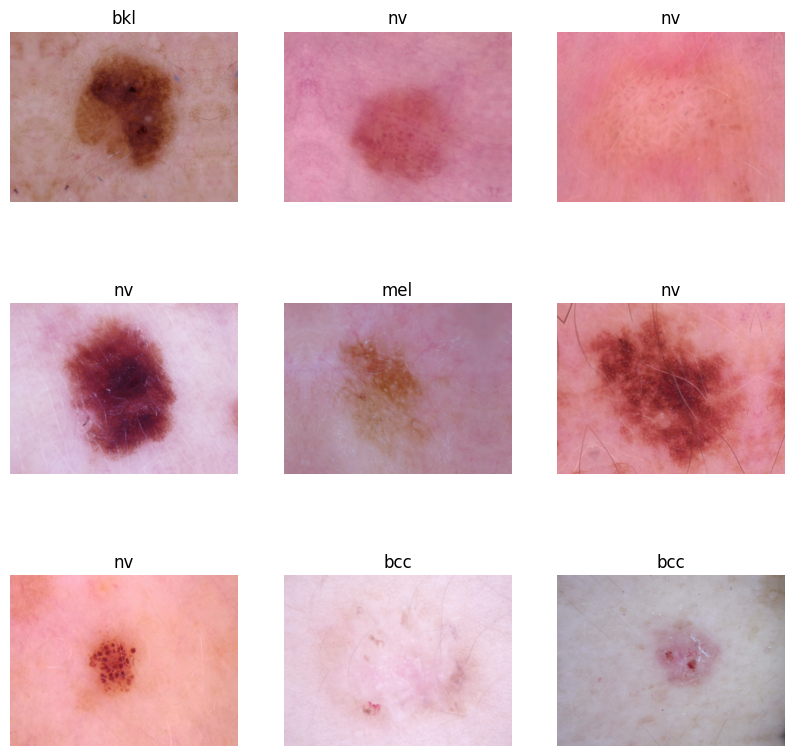

In [ ]:
#data.show_batch(rows=3, figsize=(10,10))
data.show_batch(figsize=(10,10))

In [ ]:
#arch = models.densenet121
from torchvision.models import densenet121
arch = densenet121

In [ ]:
#learn = cnn_learner(data, arch, metrics= accuracy, callback_fns=ShowGraph)
from fastai.vision.learner import vision_learner
from fastai.metrics import accuracy
from fastai.callback.progress import ShowGraphCallback
#learn = vision_learner(data, arch, metrics= accuracy, callback_fns=ShowGraph)

#learn, cb = vision_learner(data, arch, metrics= accuracy) , ShowGraphCallback()
#cb.learn = learn

learn = vision_learner(data, arch, metrics= accuracy, cbs=ShowGraphCallback())

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 97.4MB/s]


In [ ]:
#learn.summary()

Sequential (Input shape: 16 x 3 x 450 x 600)
Layer (type)         Output Shape         Param #    Trainable 
                     16 x 64 x 225 x 300 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     16 x 64 x 113 x 150 
MaxPool2d                                                      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     16 x 128 x 113 x 15 
Conv2d                                    8192       False     
BatchNorm2d                               256        True      
ReLU                                                           
___________________________________

In [ ]:
#print(type(learn))  # class 'fastai.learner.Learner'>
# dir(learn)
learn.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine

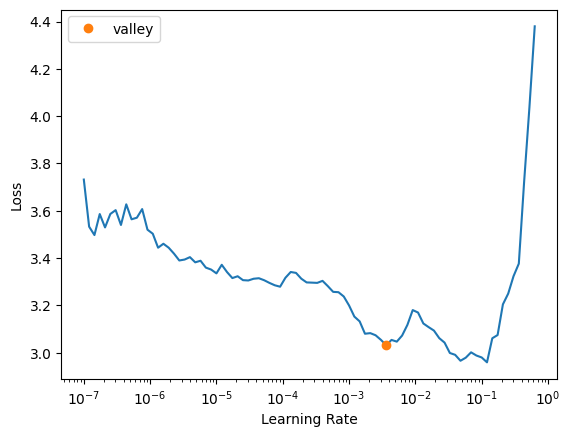

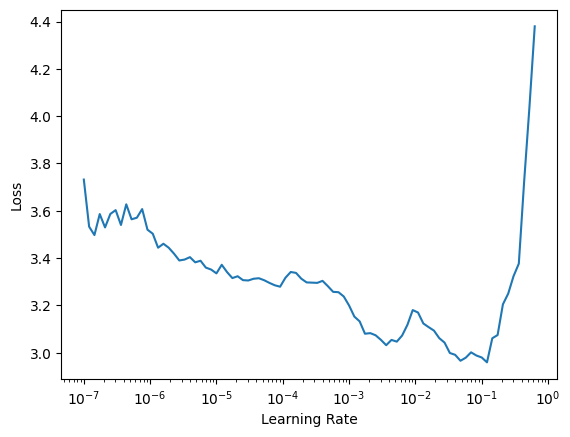

In [ ]:
learn.lr_find()
#learn.recorder.plot()
learn.recorder.plot_lr_find()

In [ ]:
#dir(learn.recorder)
#learn.recorder.plot_lr_find()

In [ ]:
# learn.get_preds  # <bound method Learner.get_preds of <fastai.learner.Learner object at 0x7f462359f4d0>>
#DatasetType.Valid
#dir(learn)
#type(learn)  # fastai.learner.Learner
# type(learn.dl)  #  NoneType
# type(learn.dls)  #  fastai.data.core.DataLoaders
# type(data)  # fastai.data.core.DataLoaders
# learn.dls  # <fastai.data.core.DataLoaders at 0x7f461b8777d0>
# data       # <fastai.data.core.DataLoaders at 0x7f461b8777d0>
# data.valid_ds  #  [(PILImage mode=RGB size=600x450, TensorCategory(1)),(PILImage mode=RGB size=600x450, TensorCategory(5)),(PILImage mode=RGB size=600x450, TensorCategory(5)),(PILImage mode=RGB size=600x450, TensorCategory(2)),(PILImage mode=RGB size=600x450, TensorCategory(5)),(PILImage mode=RGB size=600x450, TensorCategory(5)),(PILImage mode=RGB size=600x450, TensorCategory(0)),(PILImage mode=RGB size=600x450, TensorCategory(4)),(PILImage mode=RGB size=600x450, TensorCategory(5)),(PILImage mode=RGB size=600x450, TensorCategory(3))...]
#learn.dls.valid_ds  # [(PILImage mode=RGB size=600x450, TensorCategory(1)),(PILImage mode=RGB size=600x450, TensorCategory(5)),(PILImage mode=RGB size=600x450, TensorCategory(5)),(PILImage mode=RGB size=600x450, TensorCategory(2)),(PILImage mode=RGB size=600x450, TensorCategory(5)),(PILImage mode=RGB size=600x450, TensorCategory(5)),(PILImage mode=RGB size=600x450, TensorCategory(0)),(PILImage mode=RGB size=600x450, TensorCategory(4)),(PILImage mode=RGB size=600x450, TensorCategory(5)),(PILImage mode=RGB size=600x450, TensorCategory(3))...]
# learn.dls.valid  # <fastai.data.core.TfmdDL at 0x7f4624803950>
#accuracy  # <function fastai.metrics.accuracy(inp, targ, axis=-1)>
# learn.unfreeze  # <bound method Learner.unfreeze of <fastai.learner.Learner object at 0x7f462359f4d0>>

# ClassificationInterpretation.from_learner  # <bound method Interpretation.from_learner of <class 'fastai.interpret.ClassificationInterpretation'>>


<bound method Interpretation.from_learner of <class 'fastai.interpret.ClassificationInterpretation'>>

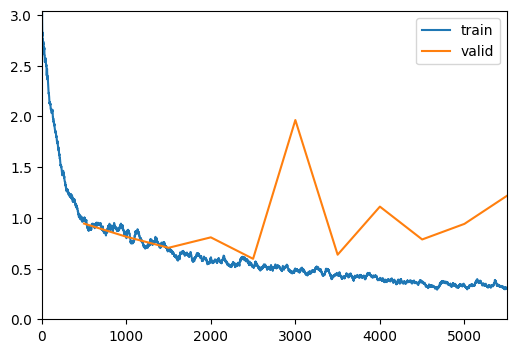

In [ ]:
learn.fit_one_cycle(11,slice(1e-02))

In [ ]:
learn.save("Derm_stage1")

Path('models/Derm_stage1.pth')

In [ ]:
#Accuracy based on validation set
# preds, y , loss = learn.get_preds(ds_type=DatasetType.Valid,with_loss=True)
# acc = accuracy(preds, y)
preds, y , loss = learn.get_preds(ds_idx=1, with_loss=True)   # ds_idx=1 for learn.dls.valid_ds
acc = accuracy(preds, y)
print('The accuracy is {0} % .'.format(acc*100))

The accuracy is TensorBase(78.6320) % .


In [ ]:
learn.summary()

Sequential (Input shape: 16 x 3 x 450 x 600)
Layer (type)         Output Shape         Param #    Trainable 
                     16 x 64 x 225 x 300 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     16 x 64 x 113 x 150 
MaxPool2d                                                      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     16 x 128 x 113 x 15 
Conv2d                                    8192       False     
BatchNorm2d                               256        True      
ReLU                                                           
___________________________________

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine

In [ ]:
learn.unfreeze()

In [ ]:
learn.summary()

Sequential (Input shape: 16 x 3 x 450 x 600)
Layer (type)         Output Shape         Param #    Trainable 
                     16 x 64 x 225 x 300 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     16 x 64 x 113 x 150 
MaxPool2d                                                      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     16 x 128 x 113 x 15 
Conv2d                                    8192       True      
BatchNorm2d                               256        True      
ReLU                                                           
___________________________________

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine

In [ ]:
#learn.lr   #  0.001
learn.dls.train_ds

(#8012) [(PILImage mode=RGB size=600x450, TensorCategory(2)),(PILImage mode=RGB size=600x450, TensorCategory(5)),(PILImage mode=RGB size=600x450, TensorCategory(5)),(PILImage mode=RGB size=600x450, TensorCategory(1)),(PILImage mode=RGB size=600x450, TensorCategory(2)),(PILImage mode=RGB size=600x450, TensorCategory(5)),(PILImage mode=RGB size=600x450, TensorCategory(5)),(PILImage mode=RGB size=600x450, TensorCategory(5)),(PILImage mode=RGB size=600x450, TensorCategory(1)),(PILImage mode=RGB size=600x450, TensorCategory(5))...]

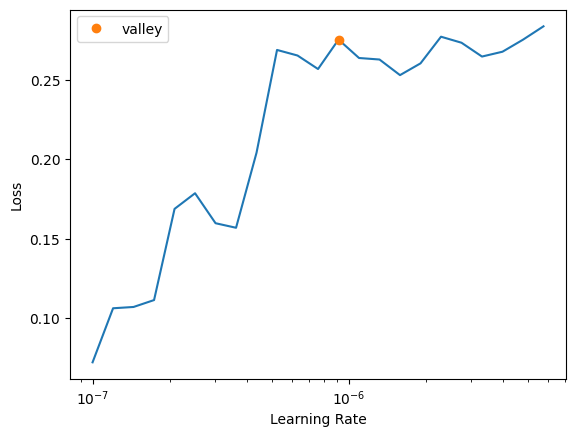

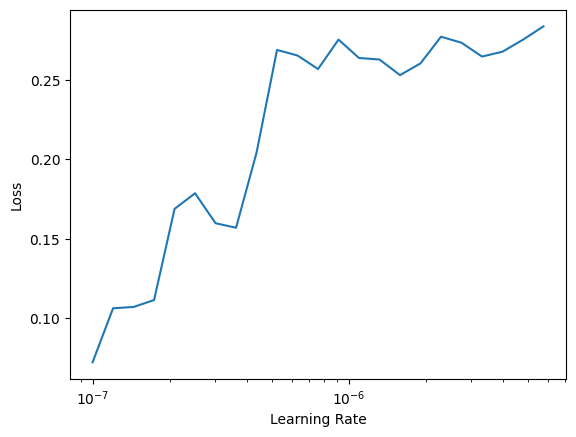

In [ ]:
learn.lr_find()
#learn.recorder.plot()
learn.recorder.plot_lr_find()

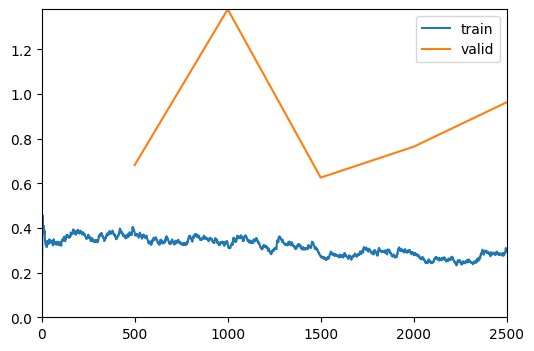

In [ ]:
learn.fit_one_cycle(5, slice(5e-6,5e-4), pct_start=0.05)

In [ ]:
learn.save("Derm_stage2")

Path('models/Derm_stage2.pth')

In [ ]:
learn.summary()

Sequential (Input shape: 16 x 3 x 450 x 600)
Layer (type)         Output Shape         Param #    Trainable 
                     16 x 64 x 225 x 300 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     16 x 64 x 113 x 150 
MaxPool2d                                                      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     16 x 128 x 113 x 15 
Conv2d                                    8192       True      
BatchNorm2d                               256        True      
ReLU                                                           
___________________________________

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine

In [ ]:
# data = ImageDataBunch.from_df(path='', df=labels,
#                               ds_tfms=tfms, size=224,bs=16,
#                                valid_pct=0.2, fn_col='path',
#                               label_col='dx'
#                               ).normalize(imagenet_stats)

data = ImageDataLoaders.from_df(path='.', df=labels,
                            ds_tfms=aug_tfms, size=224,bs=16,
                            valid_pct=0.2, fn_col='path',
                            label_col='dx',
                            batch_tfms=[*aug_tfms, Normalize.from_stats(*imagenet_stats)] )

In [ ]:
# learn.data = data
learn.dls = data

In [ ]:
learn.summary()

Sequential (Input shape: 16 x 3 x 450 x 600)
Layer (type)         Output Shape         Param #    Trainable 
                     16 x 64 x 225 x 300 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     16 x 64 x 113 x 150 
MaxPool2d                                                      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     16 x 128 x 113 x 15 
Conv2d                                    8192       True      
BatchNorm2d                               256        True      
ReLU                                                           
___________________________________

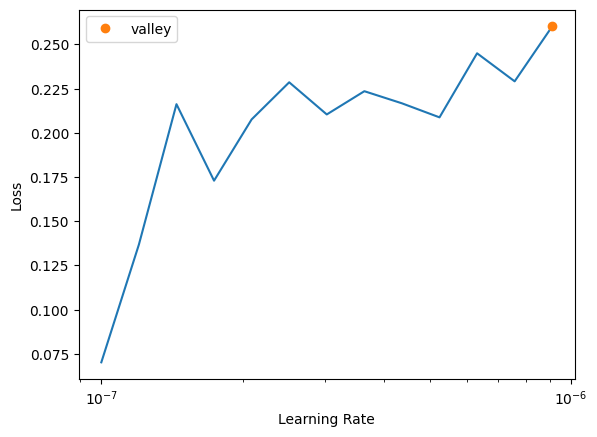

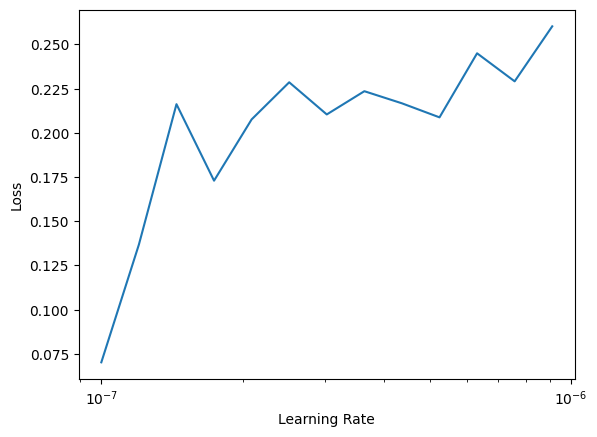

In [ ]:
learn.lr_find()
#learn.recorder.plot()
learn.recorder.plot_lr_find()

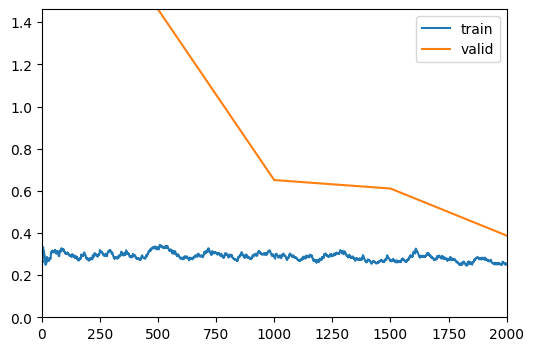

In [ ]:
learn.fit_one_cycle(4,slice(1e-04))

In [ ]:
learn.save("Derm_stage3")

Path('models/Derm_stage3.pth')

In [ ]:
learn.summary()

Sequential (Input shape: 16 x 3 x 450 x 600)
Layer (type)         Output Shape         Param #    Trainable 
                     16 x 64 x 225 x 300 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     16 x 64 x 113 x 150 
MaxPool2d                                                      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     16 x 128 x 113 x 15 
Conv2d                                    8192       True      
BatchNorm2d                               256        True      
ReLU                                                           
___________________________________

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine

In [ ]:
learn.unfreeze()


In [ ]:
learn.summary()

Sequential (Input shape: 16 x 3 x 450 x 600)
Layer (type)         Output Shape         Param #    Trainable 
                     16 x 64 x 225 x 300 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     16 x 64 x 113 x 150 
MaxPool2d                                                      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     16 x 128 x 113 x 15 
Conv2d                                    8192       True      
BatchNorm2d                               256        True      
ReLU                                                           
___________________________________

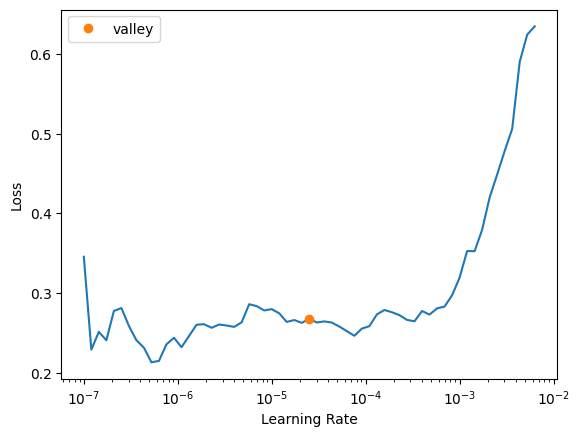

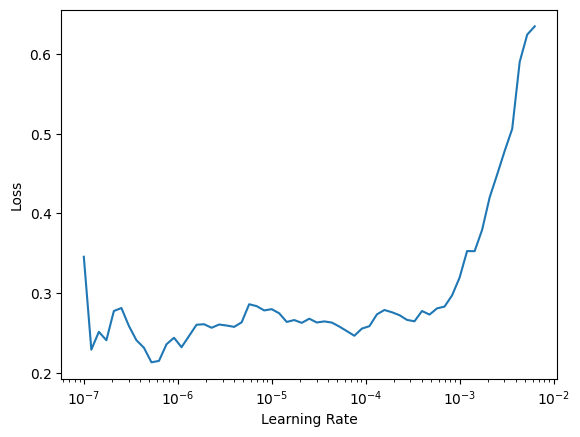

In [ ]:
learn.lr_find()
#learn.recorder.plot()
learn.recorder.plot_lr_find()

In [ ]:
# learn.cbs # (#4) [TrainEvalCallback,Recorder,CastToTensor,ProgressCallback]
#type(learn.cbs) # fastcore.foundation.L
# dir(learn.cbs)   # has append
# learn.cbs.append # <function list.append(object, /)>
#learn.cbs.append(cb)

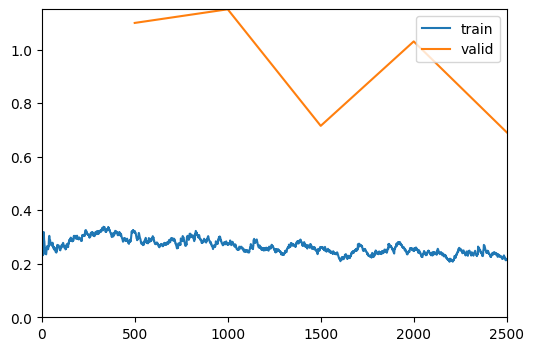

In [ ]:
learn.fit_one_cycle(5, slice(1e-5,1e-4), pct_start=0.05)

In [ ]:
learn.save("Derm_stage4")

Path('models/Derm_stage4.pth')

In [ ]:
learn.export()   # export model as export.pkl

In [ ]:
learn.summary()

Sequential (Input shape: 16 x 3 x 450 x 600)
Layer (type)         Output Shape         Param #    Trainable 
                     16 x 64 x 225 x 300 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     16 x 64 x 113 x 150 
MaxPool2d                                                      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     16 x 128 x 113 x 15 
Conv2d                                    8192       True      
BatchNorm2d                               256        True      
ReLU                                                           
___________________________________

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine

In [ ]:
#Accuracy based on validation set
# preds, y , loss = learn.get_preds(ds_type=DatasetType.Valid,with_loss=True)
# acc = accuracy(preds, y)
preds, y , loss = learn.get_preds(ds_idx=1, with_loss=True)
acc = accuracy(preds, y)
print('The accuracy is {0} % .'.format(acc*100))

The accuracy is TensorBase(85.0724) % .


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
#losses, idxs = interp.top_losses()
#len(data.valid_ds)==len(losses)==len(idxs)

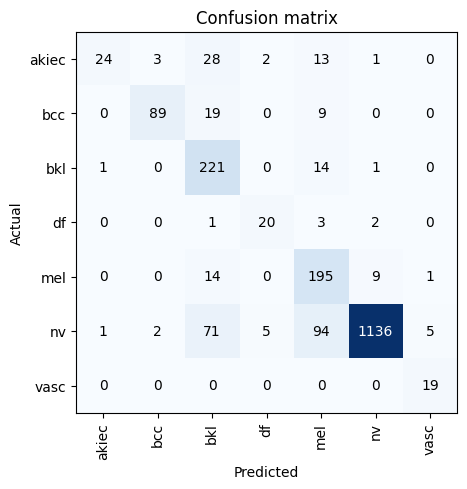

In [ ]:
interp.plot_confusion_matrix()

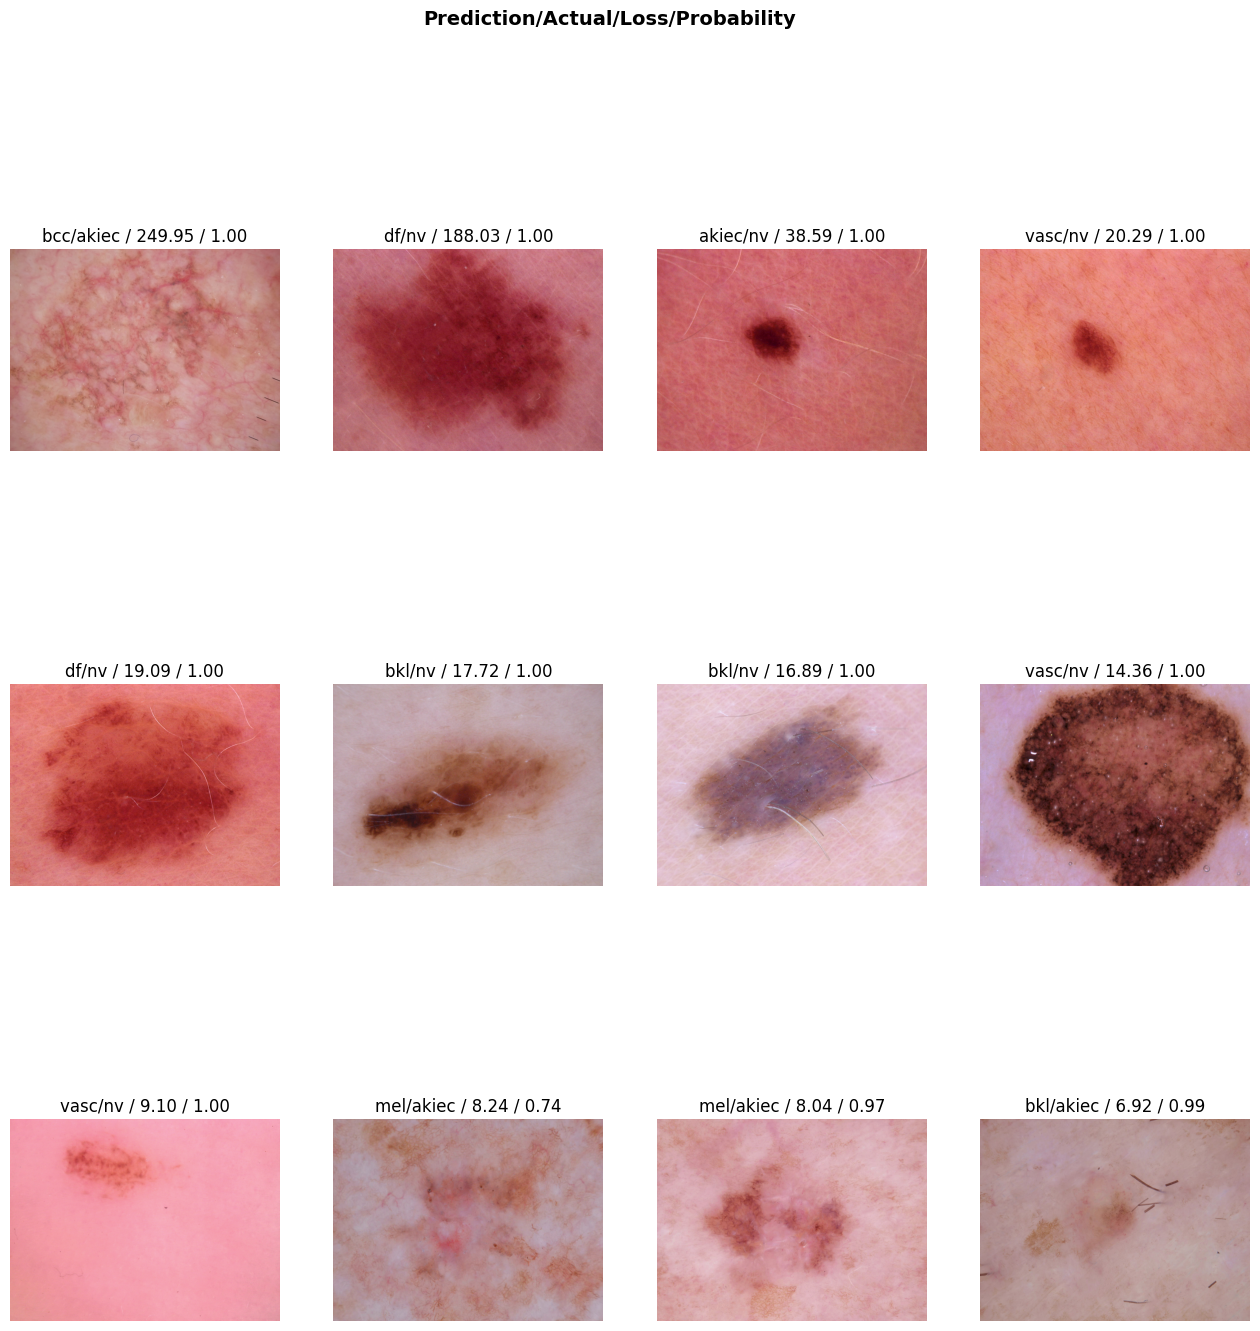

In [ ]:
#interp.plot_top_losses(12, figsize=(16,16), heatmap = False)
interp.plot_top_losses(12, figsize=(16,16))

In [ ]:

interp.most_confused()

[('nv', 'mel', 94),
 ('nv', 'bkl', 71),
 ('akiec', 'bkl', 28),
 ('bcc', 'bkl', 19),
 ('bkl', 'mel', 14),
 ('mel', 'bkl', 14),
 ('akiec', 'mel', 13),
 ('bcc', 'mel', 9),
 ('mel', 'nv', 9),
 ('nv', 'df', 5),
 ('nv', 'vasc', 5),
 ('akiec', 'bcc', 3),
 ('df', 'mel', 3),
 ('akiec', 'df', 2),
 ('df', 'nv', 2),
 ('nv', 'bcc', 2),
 ('akiec', 'nv', 1),
 ('bkl', 'akiec', 1),
 ('bkl', 'nv', 1),
 ('df', 'bkl', 1),
 ('mel', 'vasc', 1),
 ('nv', 'akiec', 1)]

In [ ]:
#learn.load('Derm_stage4')   #  load from ./models/Derm_stage4.pth

In [ ]:
#learn.export()   # export model as export.pkl

In [ ]:
learn_inf = load_learner('export.pkl')

In [ ]:
learn_inf  # <fastai.learner.Learner at 0x7fda5c1e29d0>

In [ ]:
learn_inf.dls.vocab

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

In [ ]:
import os
import urllib.request
import zipfile


urls = {
    # "train" : "https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Training_Input.zip",
    # "train_ground_truth" : "https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Training_GroundTruth.zip",
    # "validation" : "https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Validation_Input.zip",
    # "validation_ground_truth" : "https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Validation_GroundTruth.zip",
    "test" : "https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Test_Input.zip",
    "test_ground_truth" : "https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Test_GroundTruth.zip"
    #"train_seg": "https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1-2_Training_Input.zip",
    #"train_seg_gt": "https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1_Training_GroundTruth.zip",
    #"validation_seg": "https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1-2_Validation_Input.zip",
    #"validation_seg_gt": "https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1_Validation_GroundTruth.zip",

}

def download_all():
    for item in urls.items():
        name = item[0]
        url = item[1]
        filename = f"{name}.zip"
        if os.path.exists(filename):
            print(f"already exists file {filename}")
        else:
            print(f"downloading {filename} from {url} ...")
            urllib.request.urlretrieve(url, filename)
    print(f"done downloading all")

def unzip_all():
    for item in urls.items():
        name = item[0]
        url = item[1]
        filename = f"{name}.zip"
        print(filename)
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            print(f"unzipping {filename} to folder")
            zip_ref.extractall(f"{name}")


download_all()
unzip_all()

downloading test.zip from https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Test_Input.zip ...
downloading test_ground_truth.zip from https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Test_GroundTruth.zip ...
done downloading all
test.zip
unzipping test.zip to folder
test_ground_truth.zip
unzipping test_ground_truth.zip to folder


In [ ]:
# testing using ISIC 2018 test dataset
test_metadata_paths = glob('**/ISIC2018_Task3_Test_GroundTruth.csv', recursive=True)
test_meta_path = test_metadata_paths[0]
test_meta_df = pd.read_csv(test_meta_path, sep=',')
test_meta_df.head()

test_img_paths = glob('./test/**/*.jpg', recursive=True)
# print(len(test_img_paths))
# 1512

# test_meta_df[(test_meta_df['MEL'] == 0) & (test_meta_df['NV'] == 0) & (test_meta_df['BCC'] == 0) & (test_meta_df['AKIEC'] == 0) & (test_meta_df['BKL'] == 0) & (test_meta_df['DF'] == 0) & (test_meta_df['VASC'] == 0) ]
# empty

# test_meta_df[(test_meta_df['MEL'] + test_meta_df['NV'] + test_meta_df['BCC'] + test_meta_df['AKIEC'] + test_meta_df['BKL'] + test_meta_df['DF'] + test_meta_df['VASC']) > 1.0]
# empty

# len(test_meta_df[(test_meta_df['MEL'] + test_meta_df['NV'] + test_meta_df['BCC'] + test_meta_df['AKIEC'] + test_meta_df['BKL'] + test_meta_df['DF'] + test_meta_df['VASC']) == 1.0])
# 1512

dx_dict = { 1.0: "mel", 2.0:"nv", 4.0:"bcc", 8.0:"akiec", 16.0:"bkl", 32.0:"df", 64.0:"vasc" }
def to_dx(bits_num):
    return dx_dict.get(bits_num)

test_meta_df['bit_fld_num'] = test_meta_df['MEL']*1 + test_meta_df['NV']*2 + test_meta_df['BCC']*4 + test_meta_df['AKIEC']*8 + test_meta_df['BKL']*16 + test_meta_df['DF']*32 + test_meta_df['VASC']*64
test_meta_df['dx'] = test_meta_df['bit_fld_num'].apply(to_dx)

path_dict = {}
for test_img_path in test_img_paths:
    test_img_basename = os.path.basename(test_img_path)
    path_dict[test_img_basename] = test_img_path

def to_path(img_id):
    return path_dict.get(img_id + ".jpg")

test_meta_df['fullpath'] = test_meta_df['image'].apply(to_path)


def to_predict(fullpath):
    result = learn_inf.predict(fullpath)
    return result[0]

test_meta_df['inf'] = test_meta_df['fullpath'].apply(to_predict)



In [ ]:
# test_meta_df.iloc[[26]]


# result = learn_inf.predict(test_img_paths[0])
# result[0]

test_meta_df.sample(10)


image  MEL   NV  BCC  AKIEC  BKL   DF  VASC  bit_fld_num    dx  \
732   ISIC_0035276  0.0  0.0  0.0    0.0  0.0  1.0   0.0         32.0    df   
417   ISIC_0034948  0.0  0.0  0.0    0.0  1.0  0.0   0.0         16.0   bkl   
1508  ISIC_0036061  0.0  1.0  0.0    0.0  0.0  0.0   0.0          2.0    nv   
580   ISIC_0035115  0.0  0.0  0.0    0.0  1.0  0.0   0.0         16.0   bkl   
1270  ISIC_0035823  1.0  0.0  0.0    0.0  0.0  0.0   0.0          1.0   mel   
1012  ISIC_0035563  0.0  1.0  0.0    0.0  0.0  0.0   0.0          2.0    nv   
1352  ISIC_0035905  0.0  0.0  0.0    0.0  0.0  0.0   1.0         64.0  vasc   
1246  ISIC_0035799  0.0  0.0  0.0    0.0  1.0  0.0   0.0         16.0   bkl   
1323  ISIC_0035876  0.0  0.0  1.0    0.0  0.0  0.0   0.0          4.0   bcc   
535   ISIC_0035070  1.0  0.0  0.0    0.0  0.0  0.0   0.0          1.0   mel   

                                               fullpath   inf  
732   ./test/ISIC2018_Task3_Test_Input/ISIC_0035276.jpg    df  
417   ./test/ISIC2018_Task3_Test_Input/ISIC_0034948.jpg   bkl  
1508  ./test/ISIC2018_Task3_Test_Input/ISIC_0036061.jpg   bkl  
580   ./test/ISIC2018_Task3_Test_Input/ISIC_0035115.jpg   bkl  
1270  ./test/ISIC2018_Task3_Test_Input/ISIC_0035823.jpg   mel  
1012  ./test/ISIC2018_Task3_Test_Input/ISIC_0035563.jpg    nv  
1352  ./test/ISIC2018_Task3_Test_Input/ISIC_0035905.jpg  vasc  
1246  ./test/ISIC2018_Task3_Test_Input/ISIC_0035799.jpg   bkl  
1323  ./test/ISIC2018_Task3_Test_Input/ISIC_0035876.jpg   bkl  
535   ./test/ISIC2018_Task3_Test_Input/ISIC_0035070.jpg   mel

In [ ]:
test_meta_df[test_meta_df['dx'] != test_meta_df['inf']].shape

(372, 12)

In [ ]:
total_cnt = len(test_meta_df)
print(f"total tested = {total_cnt}")
num_not_correct = test_meta_df[test_meta_df['dx'] != test_meta_df['inf']].shape[0]
print(f"number not correctly predicted = {num_not_correct}")
print(f"correctly predicted % = {(total_cnt - num_not_correct)/total_cnt * 100} %")

total tested = 1512
number not correctly predicted = 372
correctly predicted % = 75.39682539682539 %


In [ ]:
test_meta_df.to_csv('test_result.csv')